# <font color="#ff9900"> **MLP com Keras**</font>
---

<font color="#66ffff">**Keras**</font> (https://keras.io/) é uma biblioteca de rede neural de código aberto escrita em Python. É projetada para ser amigável ao usuário, modular e extensível, fornecendo uma interface de alto nível para construir e treinar modelos de aprendizado profundo. O Keras é construído em cima de outros *frameworks* populares de aprendizado profundo como ``TensorFlow`` (https://www.tensorflow.org/), Microsoft Cognitive Toolkit -``CNTK`` (https://learn.microsoft.com/en-us/cognitive-toolkit/) e ``Theano`` (https://github.com/Theano/Theano), o que permite que ele aproveite o poder e desempenho desses *frameworks* enquanto fornece uma interface mais acessível e fácil de usar. Tais *frameworks* são o *backend* computacional do Keras.

O próprio ``TensorFlow`` vem com uma implementação particular do Keras, ``tf.keras``. Há suporte apenas ao ``TensorFlow`` como *backend*, oferecendo a vantagem de suporte ao TensorFlow Data API.

Além das bibliotecas ``Numpy``, ``Pandas`` e ``Matplotlib``, vamos utilizar ``keras`` de ``tensorflow``.


In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow import keras

print(f'Keras:{keras.__version__}')  # version

Keras:2.11.0


Criação do Modelo
--

Vamos criar um modelo simples com duas *hidden layers*. ``Sequential``é um modelo Keras composto de camadas empilhadas e conectadas sequencialmente entre si. 

> A primeira camada converte a entrada em um *array* 1D. No nosso caso deve receber o *shape* das imagens ($28 \times 28$), discutidas mais adiante.

> A próxima camada é uma camada densa com $300$ neurônios e uma função de ativação. Essa função de ativação <font color="#66ffff">**ReLU**</font> (Rectified Linear Unit) é um *rectifier*. Foi apresentada por Kunihiko Fukushima (1969) no contexto de extração de *visual features* em NNs. Principalmente a partir de 2011 vem sendo amplamente utilizada no treinamento de NNs profundas em substituição às funções *sigmoid* e *hyperbolic tangent*. 


\begin{align}
  f(x) = x^+ = max(x, 0) = \left\{
        \begin{array}{cl}
             x & x \gt 0 \\
             0 & otherwise             
        \end{array}
        \right.
\end{align}

sendo $x$ o neurônio de entrada.

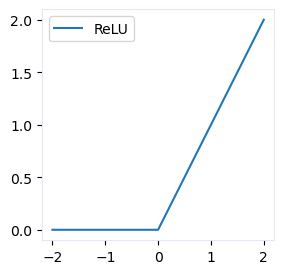

In [20]:
def relu(x):
    return np.maximum(0, x)

x = np.linspace(start = -2, stop = 2, num = 41)

fig = plt.figure(figsize=(3, 3))
ax = plt.plot(x, relu(x), label='ReLU')

plt.legend(loc='upper left')

plt.show()

> A próxima camada também é uma densa com 100 neurônios e usa a função ReLU.

> Finalmente a última camada também é uma camada densa com 10 neurônios (um por classe do nosso problema). Como as classes são exclusivas, está sendo definida a função de ativação *softmax*.

In [21]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

> O método ``summary()`` do objeto ``model`` exibe as camadas definidas no modelo. ``None``indica que o parâmetro *batch size* pode ser qualquer.

In [22]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


As camadas do modelo podem ser acessadas individualmente.

In [23]:
print(model.layers)

hidden1 = model.layers[1]  # first hidden layer

print(f'\nFirst hidden layer name:{hidden1.name}')

[<keras.layers.reshaping.flatten.Flatten object at 0x7f92c9f73c10>, <keras.layers.core.dense.Dense object at 0x7f92ed32a520>, <keras.layers.core.dense.Dense object at 0x7f92ed32a880>, <keras.layers.core.dense.Dense object at 0x7f92c9d81ca0>]

First hidden layer name:dense_3


E os parâmetros de uma camada pode ser obtidos com ``get_weights``.

Perceba os pesos (``weights``) inicializados randomicamente e os termos bias com zero.

In [24]:
weights, biases = hidden1.get_weights()

print(f'Layer weights shape:\n{weights.shape}')
print(f'\nLayer weights:\n{weights}')

print(f'\nLayer biases shape:\n{biases.shape}')
print(f'\nBiases:\n{biases}')

Layer weights shape:
(784, 300)

Layer weights:
[[-0.03226604 -0.04917274  0.04548596 ...  0.04828595 -0.00211414
   0.05033008]
 [ 0.01428305 -0.00928227 -0.03489458 ... -0.06429121  0.05810314
   0.03046471]
 [ 0.04093853 -0.00731133 -0.02465498 ... -0.07401592 -0.06780844
   0.04480711]
 ...
 [-0.00352912 -0.04517876  0.00909574 ... -0.04455146 -0.00258932
   0.06749897]
 [-0.04530695 -0.05741722  0.03929797 ...  0.07254142 -0.05510211
   0.05687495]
 [-0.0399172  -0.0037239   0.06313874 ... -0.05486939  0.00386707
  -0.07149918]]

Layer biases shape:
(300,)

Biases:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

---

> 💡 **Nota**:
É  importante destacar que as camadas densas possuem muitos parâmetros. Vejamos o caso da primeira *hidden layer*: são $784 \times 300$ pesos mais $300$ termos bias, ou seja, 235 500 parâmetros! 🙀 Essa quantidade enorme de parâmetros permite ao modelo ajustar-se de forma flexível aos dados de entrada, mas pode gerar *overfitting*, principalmente quando a quantidade de instâncias de treinamento é insuficiente.

---

Importação de um *Dataset* e Análise Exploratória
--

Vamos usar o *dataset* <font color="#ff9900">**Fashion MNIST** </font> (https://github.com/zalandoresearch/fashion-mnist) que é uma coleção de 70.000 imagens em escala de cinza de itens de vestuário, cada uma com tamanho de $28 \times 28$ pixels. Foi projetado como um substituto do conjunto de dados MNIST (http://yann.lecun.com/exdb/mnist/) mais tradicional, que contém dígitos manuscritos. Os itens de vestuário Fashion MNIST incluem itens como camisetas, calças, vestidos, tênis e sandálias, entre outros. É um *dataset* mais desafiador do que o MNIST original, pois contém imagens mais complexas e variadas. Também é mais relevante para aplicações do mundo real, pois imita de perto o tipo de imagens que são comumente encontradas em aplicativos de comércio eletrônico e *sites* de compras *on-line*.



In [25]:
fashion_mnist = keras.datasets.fashion_mnist

In [26]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Carregada a base, vamos investigar o conteúdo. Cada imagem é representada como um *array* $28 \times 28$, sendo cada intensidade na faixa $0-255$ ao invés de floats.

In [27]:
print(f'Dataset shape:{X_train_full.shape}')

print(f'First instance shape:{X_train_full[0].shape}')
print(f'\nFirst instance:\n {X_train_full[0]}')

Dataset shape:(60000, 28, 28)
First instance shape:(28, 28)

First instance:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141

Mas o que é esse *array*? 🤔
Vamos exibi-lo como uma imagem usando ``plt.imshow``.


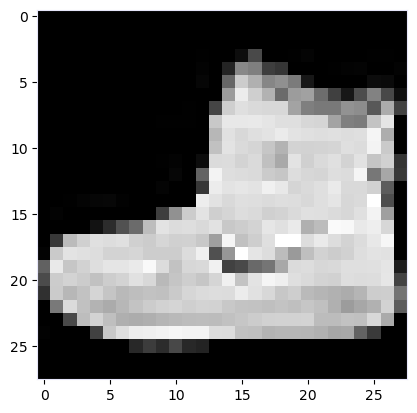

In [28]:
fig = plt.imshow(X_train_full[0], cmap=plt.cm.gray)
plt.show()

Super! Parece um tipo de calçado, *ankle boot*. 👢

Felizmente temos o rótulo de cada imagem (instância). Vamos mapear o códigos das rótulos para os nomes das classes. Veja em https://github.com/zalandoresearch/fashion-mnist.

In [29]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Vamos exibir algumas instâncias. Lembrando que os códigos dos rótulos estão em ``y_train_full``.

In [30]:
print(f'Class name of first instance: {class_names[y_train_full[0]]}')

Class name of first instance: Ankle boot


Com isso vamos gerar uma grade para visualizar as 25 primeiras instâncias do dataset ``X_train_full``.

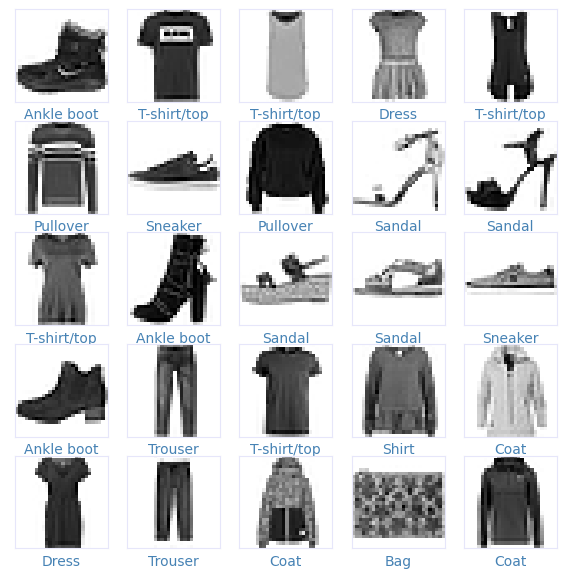

In [31]:
# import matplotlib.colors as mcolors

plt.rc('axes',edgecolor='lavender')

fig = plt.figure(figsize=(7, 7))

for i in range(25):  # First 25 instances
    plt.subplot(5, 5, i + 1)
    
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]], color='steelblue')

plt.show()

Veja que o *dataset* **já veio dividido em treinamento e teste**. Mas, vamos criar um conjunto adicional de validação, ``X_valid``, e o respectivo conjunto de *labels* ``y_valid``. Note que separamos 5000 instâncias para o conjunto de validação e o restante será uado para o treinamento.

E como estamos utilizando uma NN com o algoritmo de treinamento <font color="#66ffff">Gradient Descent (GD) </font> devemos normalizar as *features*. Aqui vamos colocar os pixels na escala $0-1$.

In [32]:
X_valid, X_train = X_train_full / 255.0, X_train_full / 255.0
y_valid, y_train = y_train_full, y_train_full

Compilação
--

Antes do modelo ser treinado ele precisa ser compilado através do método ``compile``. Nesse momento especificamos qual será a função *loss* e qual será o otimizador. Opcionalmente podemos fornecer quais métricas de avaliação desejamos calcular durante o processo de treinamento, como por exemplo ``accuracy``.

> A função ``sparse_categorical_crossentropy`` é usada para classes mutuamente exclusivas, i.e., cada instância pertence exatamente a uma classe. No nosso caso, índices exclusivos na faixa de $0$ a $9$.

> Nosso otimizador será Stochastic Gradient Descent (``sgd``). O default do *learning rate* é $0.01$. Assim, opcionalmente pode-ser usar em ``compile`` com ``optimizer=keras.optimizers.SGD(lr=eta)`` fornecendo em ``eta``o valor de *learning rate* desejado. 

> Finalmente, em geral, desejamos saber a acurácia do nosso modelo classificador. Assim setamos ``metrics`` para ``accuracy``. 


Depois de compilado nosso modelo está pronto para ser treinado. Vamos lá!

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Treinamento
--

Para efetuar o treinamento basta chamar o método ``fit``, especificando o conjunto de treinamento ``X_train``, os respectivos labels ``y_train``, o número de épocas, aqui 30, e os conjuntos de validação correspondentes.


---

> 💡 **Nota**:
Destaca-se que a **validação é opcional**.

---


In [34]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6926 - accuracy: 0.7746 - val_loss: 0.4881 - val_accuracy: 0.8326
Epoch 2/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4743 - accuracy: 0.8346 - val_loss: 0.4528 - val_accuracy: 0.8407
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4317 - accuracy: 0.8493 - val_loss: 0.4039 - val_accuracy: 0.8592
Epoch 4/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4063 - accuracy: 0.8581 - val_loss: 0.3836 - val_accuracy: 0.8656
Epoch 5/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3863 - accuracy: 0.8645 - val_loss: 0.3877 - val_accuracy: 0.8630
Epoch 6/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3725 - accuracy: 0.8696 - val_loss: 0.3888 - val_accuracy: 0.8650
Epoch 7/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3593 - accuracy: 0.8727 - val_loss: 0.3418 - val_ac

> Avaliação do Treinamento

Vamos plotar as curvas de acurácia e *loss*.

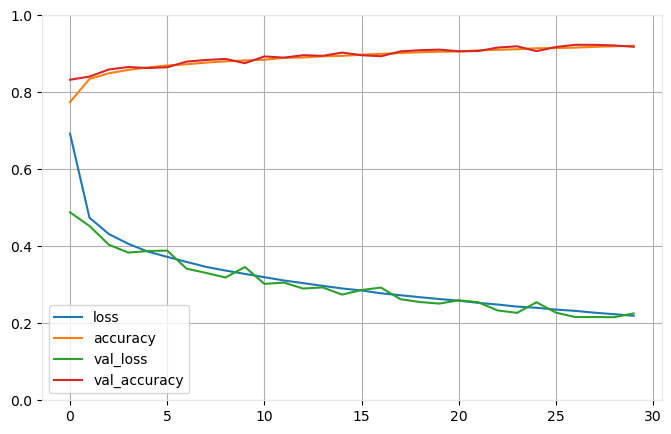

In [35]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.show()

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 77.2621 - accuracy: 0.8338


[77.26213836669922, 0.8338000178337097]

Conseguimos $84\%$!😹🥳

Classificação
--

Uma vez treinado o modelo podemos fazer predições com o método ``predict``.

Vamos ver como o modelo comporta-se com as dez primeiras instâncias.

In [37]:
X_new = X_test[:10]
y_proba = model.predict(X_new)

print(f'Probability scores:\n {y_proba.round(2)}')


1/1 [==============================] - 0s 425ms/step
Probability scores:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


O modelo estima uma probabilidade por classe.

Mas, quais são essas classes?

In [38]:
classes_y = np.argmax(y_proba, axis=1)

print(classes_y)

print(f'Predicted classes:\n {np.array(class_names)[classes_y]}')

[9 2 1 1 0 1 4 6 5 7]
Predicted classes:
 ['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'T-shirt/top' 'Trouser'
 'Coat' 'Shirt' 'Sandal' 'Sneaker']


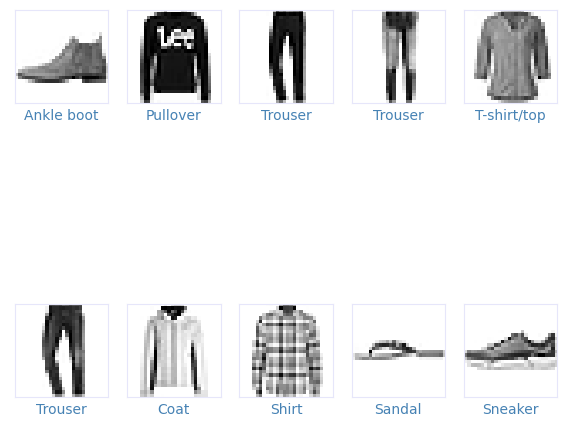

In [39]:
plt.rc('axes',edgecolor='lavender')

fig = plt.figure(figsize=(7, 7))

for i in range(10):  # First 10 instances
    plt.subplot(2, 5, i + 1)
    
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_new[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[classes_y[i]], color='steelblue')

plt.show()

*Les carottes sont cuites!* 🥕🥕🥕 

---
<font color="#ffb31a">Fabio Alexandre **SPANHOL**</font> <faspanhol@gmail.com>

<font color="#cccccc">*Updated: May 13th 2023*</font>